# 텍스트 마이닝을 활용한 영화 평점 감성 분석

## 1) 영화 평점 데이터 크롤링

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib import parse

base_url = "https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=155263&target=after&page={}"
url = base_url.format(1)
res = requests.get(url)

soup = BeautifulSoup(res.text)
tds = soup.select('table.list_netizen > tbody > tr > td.title')

for td in tds:
    movie_title = td.select_one('a.movie').text.strip()
    score = td.select_one('div.list_netizen_score > em').text.strip()
    comment = td.select_one('br').next_sibling.strip()
    print(movie_title, score, comment, sep=' :: ')
    print('-------------------------------------------')

버닝 :: 7 :: 생각보다 잼잇는데, 사람을 너무 잘죽인다. 영화처럼 사람죽이면 남아나는 사람이 없겟네. 벤이 해미를 죽엿다생각하여 죽인건가
-------------------------------------------
버닝 :: 10 :: 셈 페킨파 영화입니까...? 완벽합니다, 저에겐.
-------------------------------------------
버닝 :: 1 :: 너무 지루함.  이창동영화 다시는 안볼거임
-------------------------------------------
버닝 :: 4 :: 아니 그래서 여주가 어떻게 됫다는거니?  끝까지 봣더만 의문과 답답함만 남겨준 영화
-------------------------------------------
버닝 :: 8 :: 이창동 감독의 품격에 놀란다
-------------------------------------------
버닝 :: 10 :: 해미는 어디로 간건여 죽은건가   해미복수 해준건 다행이다   썩을놈
-------------------------------------------
버닝 :: 10 :: 결말을 찾아보게 되는 영화 오랜만입니다.. 왜그랬을까 왜그런걸까 끊임없이 추론해가며 스릴도 어마어마했습니다.
-------------------------------------------
버닝 :: 8 :: 극렬하게 타오른 분노의 자리에 남은 건 사라지는 연기뿐
-------------------------------------------
버닝 :: 2 :: 와 진짜 본거중에최악이다 늦은전개 오바야 ㄹㅇ
-------------------------------------------
버닝 :: 2 :: 유아인이 좋아 보긴했지만,구질구질한 독립영화 분위기...
-------------------------------------------


In [3]:
import time
import random

comment_list=[] # 저장 할 리스트
for page in range(1, 1001):
    url = base_url.format(page)
    res = requests.get(url)
    
    soup = BeautifulSoup(res.text, 'lxml')
    tds = soup.select('table.list_netizen > tbody > tr > td.title')
    
    for td in tds:
        score = td.select_one('div.list_netizen_score > em').text.strip()
        comment = td.select_one('br').next_sibling.strip()
        if comment != '' : # comment가 빈값이 아니라면 리스트에 추가
            comment_list.append((score, comment)) 
    delay = round(random.uniform(0.2, 1.2), 2) # 크롤링을 위해 페이지 전환을 빠르게 하게되면 네이버에서 막을 수 있기에 delay를 걸어준다.
    time.sleep(delay)
    

In [5]:
print(comment_list)

[('7', '생각보다 잼잇는데, 사람을 너무 잘죽인다. 영화처럼 사람죽이면 남아나는 사람이 없겟네. 벤이 해미를 죽엿다생각하여 죽인건가'), ('10', '셈 페킨파 영화입니까...? 완벽합니다, 저에겐.'), ('1', '너무 지루함.  이창동영화 다시는 안볼거임'), ('4', '아니 그래서 여주가 어떻게 됫다는거니?  끝까지 봣더만 의문과 답답함만 남겨준 영화'), ('8', '이창동 감독의 품격에 놀란다'), ('10', '해미는 어디로 간건여 죽은건가   해미복수 해준건 다행이다   썩을놈'), ('10', '결말을 찾아보게 되는 영화 오랜만입니다.. 왜그랬을까 왜그런걸까 끊임없이 추론해가며 스릴도 어마어마했습니다.'), ('8', '극렬하게 타오른 분노의 자리에 남은 건 사라지는 연기뿐'), ('2', '와 진짜 본거중에최악이다 늦은전개 오바야 ㄹㅇ'), ('2', '유아인이 좋아 보긴했지만,구질구질한 독립영화 분위기...'), ('10', '페미가 삻어하는영호ㅓ'), ('10', '미치도록 아름다운 내 삶의 최고의 영화'), ('10', '유아인 스티븐연 전종서'), ('10', '방송에 나올때 딴일하며 봐서 재미없었는데 넷플에서 보니 스토리 연기 주제 다 좋고 흥미진진'), ('8', '하루키 원작답게 성관계와 마약 살인이 나온다. 여배우의 관능미가 대단하고 흐느적 거리는 분위기 표현이 좋다. 이창동 답게 분노를 직설적으로 토해낸다.'), ('10', '좋았음 전개 방식이 맘에듬 유아인씨는 진짜 연기 잘하는 배우라는거 다시 한 번 느꼈고 스티븐 연님 한국어 연기도 인상적이었음'), ('10', '유아인  연기정말잘하는거같아요  전반부에  전종서랑 담배피우면서 침뱉는데 정말 찌질한연기를잘한다고 생각이들었습니다 후에  미행하면서 포터에서  빵이랑우유먹는씬도 너무좋았구요  젊은친구지만 최민식  다음으로 좋아하는 배우가 되었습니다'), ('1', '꼭 ㄸ쳐야했나요????'), ('1', '고급재료로 만든 요리 결국 똥촬영에 많은 공의 흔적이 보이는데 

In [6]:
import pandas as pd
df = pd.DataFrame(comment_list,columns=['rate','comment'])
df.to_csv('burning_naver_comment_blank_removed_minimum.csv', encoding='utf-8', index = False)

## 2) 텍스트 전처리를 위한 데이터 셋 살펴보기

In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/nexussord/HUFS_MLP/main/spider_naver_comment_blank_removed_minimum.csv")

In [12]:
df.head()

rate               comment
0    10            스파이더맨 최고~~
1    10  123,12 다 보고가길, 레전드에요
2     9  영화 끝나기도 전에 또 보고 싶어졌다
3     1         마블은 이제 끝난듯...
4    10    너무나도 잼있게 보았습니다!!!!

In [13]:
df.shape

(9350, 2)

In [14]:
df.isnull().sum() # 데이터 무결성 확인

rate       0
comment    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rate     9350 non-null   int64 
 1   comment  9350 non-null   object
dtypes: int64(1), object(1)
memory usage: 146.2+ KB


In [24]:
df['comment'][7]

'기대이하이고 , 넘 실망스러운게 억지감동이 심함 일류배우들이 나오는 삼류스토리;;'

In [25]:
len(df['comment'].values.sum())

408963

## 3) 한국어 텍스트 전처리

### Konlpy 설치

In [53]:
!pip install konlpy==0.5.1 jpype1 

### 정규표현식 적용

In [19]:
import re

def filter(text):
    korean = re.compile('[^ ㄱ-ㅣ가-힣]') # 한글만 추출할 수 있게끔
    result = korean.sub('', text)
    return result

In [26]:
filter(df['comment'][7])

'기대이하이고  넘 실망스러운게 억지감동이 심함 일류배우들이 나오는 삼류스토리'

### 명사 형태소 추출

In [28]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(filter(df['comment'][7]))
nouns

['이하', '실망', '게', '감동', '일류', '배우', '삼류', '스토리']

In [29]:
nouns = nouns_tagger.nouns(filter("".join(df['comment'].tolist()))) # corpus(전체)에서 명사 형태소 추출

In [31]:
counter = Counter(nouns) # Counter 클래스를 통해 가장 자주 등장하는 단어 추출
counter.most_common(20) 

[('스파이더맨', 3769),
 ('영화', 3156),
 ('마블', 1503),
 ('최고', 1271),
 ('진짜', 1167),
 ('감동', 877),
 ('팬', 689),
 ('시리즈', 604),
 ('스토리', 548),
 ('그냥', 521),
 ('선물', 506),
 ('때', 503),
 ('것', 494),
 ('정말', 477),
 ('꼭', 445),
 ('피터', 439),
 ('보고', 438),
 ('더', 426),
 ('수', 426),
 ('역대', 424)]

### 한 글자 명사 제거

In [37]:
counter = Counter({x : counter[x] for x in counter if len(x) > 1})
counter.most_common(20)

[('스파이더맨', 3769),
 ('영화', 3156),
 ('마블', 1503),
 ('최고', 1271),
 ('진짜', 1167),
 ('감동', 877),
 ('시리즈', 604),
 ('스토리', 548),
 ('그냥', 521),
 ('선물', 506),
 ('정말', 477),
 ('피터', 439),
 ('보고', 438),
 ('역대', 424),
 ('사람', 411),
 ('엔드게임', 392),
 ('생각', 370),
 ('스파', 318),
 ('장면', 303),
 ('눈물', 297)]

### 불용어 처리

In [34]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/nexussord/HUFS_MLP/main/Stopwords/stopwords.txt").values.tolist()
print(stopwords[:10])

# 불용어 사전 출처 - https://www.ranks.nl/stopwords/korean

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해']]


In [35]:
data_stopwords = ['스파이더맨', '영화', '마블', '피터', '엔드게임'] # 스파이더맨 영화 관련 불용어 정의
for word in data_stopwords: # 기존 불용어 목록에 추가
    stopwords.append(word)

## BoW (Bag of Words) 벡터 생성

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def text_filter(comment): # 정규표현식 적용
    korean = re.compile('[^ ㄱ-ㅣ가-힣]')
    result = korean.sub('', comment)
    tagger = Okt()
    nouns = nouns_tagger.nouns(result) # 명사 형태소 추출
    nouns = [x for x in nouns if len(x) > 1] # 한 글자 단어 제거
    nouns = [x for x in nouns if x not in stopwords] # 불용어 처리
    return nouns # 모든 전처리가 완료된 형태소들

vec = CountVectorizer(tokenizer = lambda x: text_filter(x))
bow_vec = vec.fit_transform(df['comment'].tolist())
word_list = vec.get_feature_names()
count_list = bow_vec.toarray().sum(axis=0)

In [41]:
word_list

['가기',
 '가까이',
 '가끔',
 '가나다',
 '가난',
 '가는쥴',
 '가능',
 '가능성',
 '가득',
 '가뜩이나',
 '가라',
 '가로',
 '가르침',
 '가면',
 '가모',
 '가미',
 '가선',
 '가세',
 '가스',
 '가슴',
 '가슴속',
 '가시',
 '가십',
 '가야',
 '가오',
 '가요',
 '가운데',
 '가원',
 '가위손',
 '가입',
 '가장',
 '가족',
 '가즈',
 '가지',
 '가짜',
 '가치',
 '가치관',
 '가토',
 '가필드',
 '각각',
 '각기',
 '각본',
 '각본가',
 '각성',
 '각오',
 '각의',
 '각인',
 '각자',
 '각종',
 '각하',
 '간격',
 '간교',
 '간나',
 '간다',
 '간다라',
 '간만',
 '간반',
 '간섭',
 '간의',
 '간이',
 '간전',
 '간접',
 '간지',
 '간직',
 '간혹',
 '갈고',
 '갈기',
 '갈기갈기',
 '갈껄',
 '갈등',
 '갈라',
 '갈라고',
 '갈래',
 '갈릴',
 '갈림길',
 '갈수',
 '갈수록',
 '갈이',
 '감개',
 '감격',
 '감당',
 '감독',
 '감동',
 '감동씬',
 '감명',
 '감사',
 '감상',
 '감성',
 '감수',
 '감안',
 '감옥',
 '감점',
 '감정',
 '감정씬',
 '감정이입',
 '감청',
 '감탄',
 '감탄사',
 '감회',
 '감흥',
 '감히',
 '갑자기',
 '값어치',
 '갓띵작',
 '갓블',
 '강도',
 '강력',
 '강릉',
 '강변',
 '강사',
 '강요',
 '강의',
 '강점',
 '강조',
 '강추',
 '강추임',
 '개강',
 '개개',
 '개과천선',
 '개굿',
 '개그',
 '개깜널',
 '개꿀',
 '개꿀잼',
 '개꿀잼임',
 '개념',
 '개도',
 '개두',
 '개똥',
 '개띵작',
 '개멋',
 '개미',
 '개발',
 '개별',
 '개봉',
 '개봉일',
 '개뿔',
 '개설'

In [42]:
count_list

array([7, 3, 3, ..., 8, 1, 1])

In [45]:
bow_vec.shape

(9350, 5227)

In [46]:
word_count_dic = dict(zip(word_list, count_list))
word_count_dic

{'가기': 7,
 '가까이': 3,
 '가끔': 3,
 '가나다': 2,
 '가난': 1,
 '가는쥴': 1,
 '가능': 10,
 '가능성': 6,
 '가득': 5,
 '가뜩이나': 1,
 '가라': 4,
 '가로': 1,
 '가르침': 2,
 '가면': 26,
 '가모': 1,
 '가미': 2,
 '가선': 1,
 '가세': 22,
 '가스': 2,
 '가슴': 153,
 '가슴속': 1,
 '가시': 9,
 '가십': 1,
 '가야': 11,
 '가오': 3,
 '가요': 5,
 '가운데': 1,
 '가원': 1,
 '가위손': 1,
 '가입': 1,
 '가장': 150,
 '가족': 17,
 '가즈': 5,
 '가지': 49,
 '가짜': 1,
 '가치': 22,
 '가치관': 3,
 '가토': 1,
 '가필드': 102,
 '각각': 6,
 '각기': 1,
 '각본': 18,
 '각본가': 3,
 '각성': 6,
 '각오': 5,
 '각의': 1,
 '각인': 1,
 '각자': 10,
 '각종': 2,
 '각하': 1,
 '간격': 1,
 '간교': 1,
 '간나': 1,
 '간다': 25,
 '간다라': 1,
 '간만': 34,
 '간반': 9,
 '간섭': 1,
 '간의': 1,
 '간이': 1,
 '간전': 1,
 '간접': 2,
 '간지': 4,
 '간직': 2,
 '간혹': 1,
 '갈고': 3,
 '갈기': 1,
 '갈기갈기': 1,
 '갈껄': 1,
 '갈등': 8,
 '갈라': 1,
 '갈라고': 1,
 '갈래': 2,
 '갈릴': 1,
 '갈림길': 1,
 '갈수': 1,
 '갈수록': 14,
 '갈이': 1,
 '감개': 1,
 '감격': 34,
 '감당': 1,
 '감독': 43,
 '감동': 877,
 '감동씬': 2,
 '감명': 9,
 '감사': 16,
 '감상': 37,
 '감성': 28,
 '감수': 1,
 '감안': 3,
 '감옥': 1,
 '감점': 2,
 '감정': 81,
 '감정씬': 2,
 '감정이입': 4,
 

## TF-IDF 적용

### TF-IDF 변환

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_idf_vec = TfidfTransformer()
tf_idf_vec = tfidf_vec.fit_transform(bow_vec)

In [55]:
print(tf_idf_vec[0])

  (0, 4388)	1.0


### 벡터 : '단어' 맵핑

In [57]:
index_vec = {v: k for k, v in vec.vocabulary_.items()}
print(str(index_vec)[:100]+'..')

{4388: '최고', 1270: '레전드', 1906: '보고', 3531: '이제', 3205: '올해', 30: '가장', 3119: '영화인', 1103: '동시', 229..


## Logistic Regression 분류

<AxesSubplot:>

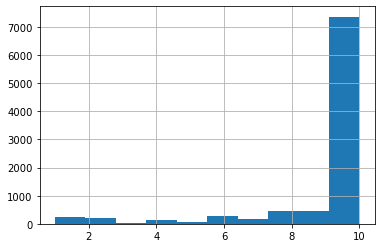

In [59]:
df.rate.hist()